<b>Modules

In [1]:
import tensorflow.keras as modle
import random
import collections
import numpy as np
import matplotlib.pyplot as plt

<b>Display Images with Label Randomly

In [2]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

<b>Information About Dataset

In [3]:
# Loading dataset
dataset = modle.datasets.mnist.load_data()

In [4]:
# Display the Length of the Training & Testing Dataset
print("There are",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][0]),"images in Testing  dataset")

There are 60000 images in training dataset
There are 10000 images in Testing  dataset


In [5]:
# Display the total Images and Shape of the Images (Training & Testing)
print('The Shape of the Traning Dataset is : {}'.format(dataset[0][0].shape))
print('The Shape of the Testing Dataset is : {}'.format(dataset[1][0].shape))

The Shape of the Traning Dataset is : (60000, 28, 28)
The Shape of the Testing Dataset is : (10000, 28, 28)


In [6]:
# Display the Shape of the Each Image ( Training & Testing Dataset )
print('The Shape of the First Traning Image is  : {}'.format(dataset[0][0][0].shape))
print('The Shape of the Second Testing Image is : {}'.format(dataset[1][0][0].shape))

The Shape of the First Traning Image is  : (28, 28)
The Shape of the Second Testing Image is : (28, 28)


In [7]:
# Display the Total Labels of the Training & Testing Dataset
print('The Total Label of the Tarining Dataset is : {}'.format(dataset[0][1].shape))
print('The Total Label of the Testing  Dataset is : {}'.format(dataset[1][1].shape))

The Total Label of the Tarining Dataset is : (60000,)
The Total Label of the Testing  Dataset is : (10000,)


In [8]:
# Again Display the Labels of Training & Testing
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in Testing  dataset for",len(dataset[1][0]),"images in Testing  dataset")

There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in Testing  dataset for 10000 images in Testing  dataset


<b>Display the Images (Training & Testing)

Randomly printing 10 images with labels from training dataset
index: 19880
Lable: 1


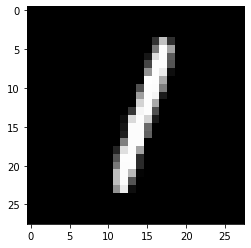

index: 22236
Lable: 2


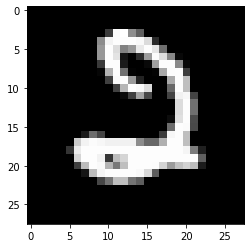

index: 32115
Lable: 3


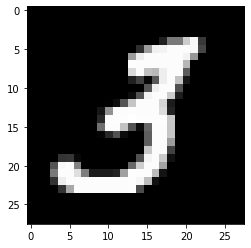

index: 50577
Lable: 1


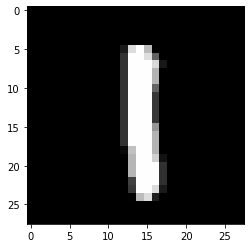

index: 30910
Lable: 9


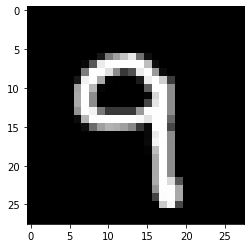

index: 21104
Lable: 8


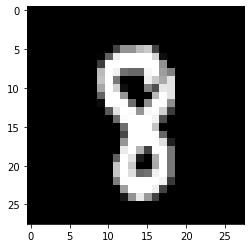

index: 10506
Lable: 5


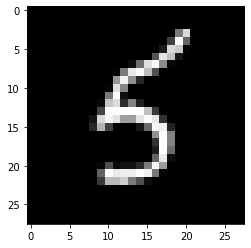

index: 31084
Lable: 1


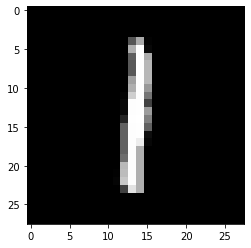

index: 23864
Lable: 9


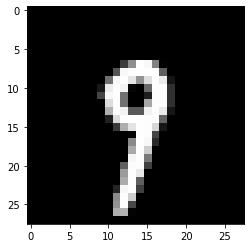

index: 44314
Lable: 0


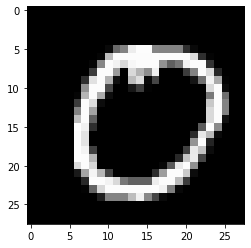

In [9]:
print("Randomly printing 10 images with labels from training dataset")

display_random_images_with_labels(dataset[0])

Randomly printing 10 images with labels from testing dataset
index: 5910
Lable: 5


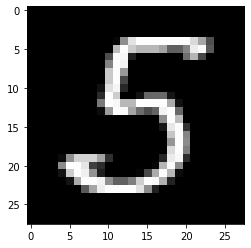

index: 4173
Lable: 2


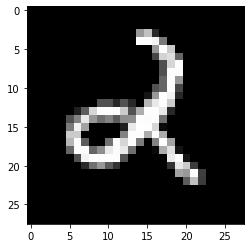

index: 7231
Lable: 0


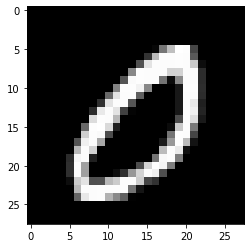

index: 1277
Lable: 9


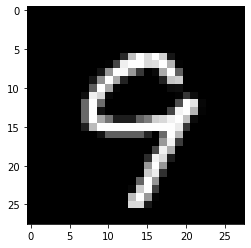

index: 8244
Lable: 1


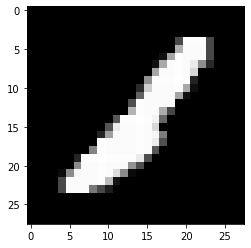

index: 3928
Lable: 5


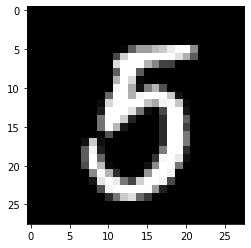

index: 316
Lable: 6


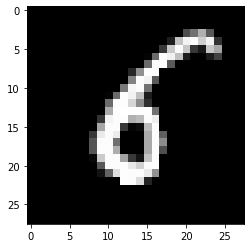

index: 9028
Lable: 9


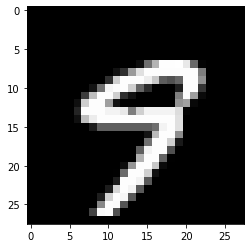

index: 4280
Lable: 9


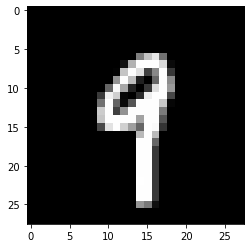

index: 1223
Lable: 0


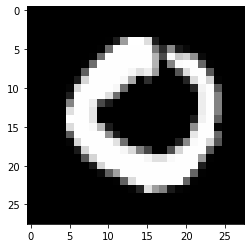

In [10]:
print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(dataset[1])

<b>Display the Training Dataset Unique Classes

In [11]:
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")

There are 10 unique classes in training dataset


In [12]:
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))

Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

<b>Display the Testing Dataset unique Classes

In [13]:
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")

There are 10 unique classes in validation dataset


In [14]:
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(dataset[1][1]))

Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

<h2>Task (Reduce the Size of Dataset 10 Times)

In [15]:
# Define the Unique Classes with Value 0
def classesCount():
    classes = {"0":0, "1":0, "2":0, "3":0, "4":0, "5":0, "6":0, "7":0, "8":0, "9":0}
    return classes

def classesIndex():
    classes = {"0":[], "1":[], "2":[], "3":[], "4":[], "5":[], "6":[], "7":[], "8":[], "9":[]}
    return classes

# Get the Images with the The Help of Indexing 
def getImages(classesIndex , checker): 
    images = []
    labels = []
    index = 0 
    for data in ["0" , "1" , "2" , "3" , "4" , "5" , "6" , "7" , "8" , "9"]:
        classIndex = classesIndex[data]
        for class_index in classIndex:
            images.append(dataset[checker][0][class_index])
            labels.append(int(data))
            index += 1
    return images , labels

In [16]:
def reduceDataset(dataset , classCount , classIndex , checker):
    
    Count = classCount    # Get the Each Class Count
    Index = classIndex    # Get the Each Class Index
    
    allImages = list(dataset[checker][0])  # Get the All Images
    allLabels = list(dataset[checker][1])  # Get the All Labels of the Images
    
    # Get the Training or Testing Data with the Help of Checker Variable
    checkDataset = lambda checker: 600 if checker == 0 else 100
    
    for index in range(0,len(allLabels)):
        # Get the (one by one) Label by using Indexing
        label = allLabels[index] 

        # Get the Class Label from Count Variable
        countLabel = Count[str(label)] 

        if countLabel != checkDataset(checker):    #  --> Here we Apply the Condition 100/600
            countLabel += 1
            Count[str(label)] = countLabel

            # Get the Each Class Indexes
            listClassIndexes = Index[str(label)]
            listClassIndexes.append(index)
            Index[str(label)] = listClassIndexes
    
    return Index , Count

<b>Train Dataset Reduce

In [17]:
countClassess = classesCount()
indexClasses  = classesIndex()

classIndexesTrain , classCountTrain = reduceDataset(dataset , countClassess , indexClasses , 0)

<b>Test Data Reduce

In [18]:
countClassess = classesCount()
indexClasses  = classesIndex()

classIndexesTest , classCountTest = reduceDataset(dataset , countClassess , indexClasses , 1)

<b>Create the New Dataset 

In [19]:
# Get the Train Images and Labels
imagesTrainDataset ,labelTarinDataset = getImages(classIndexesTrain , 0)

# Get the Test Images and Labels
imagesTestDataset , labelTestData =  getImages(classIndexesTest , 1)

In [20]:
# Create the New Dataset
new_dataset = ((np.array(imagesTrainDataset) , np.array(labelTarinDataset)),(np.array(imagesTestDataset) , np.array(labelTestData)))

<h2> Validation of Task

In [21]:
# Checking the shape of first image in new training dataset
print(new_dataset[0][0][0].shape)

(28, 28)


<b>Checking the size of dataset

In [22]:
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")

There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset


<b>Checking the number of images per class

In [23]:
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")

There are 10 unique classes in training dataset


In [24]:
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(new_dataset[0][1]))

Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

In [25]:
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")

There are 10 unique classes in validation dataset


In [26]:
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(new_dataset[1][1]))

Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

<b>Checking the correctness of indexing of image and its labels

Randomly printing 10 images with labels from training dataset
index: 5434
Lable: 9


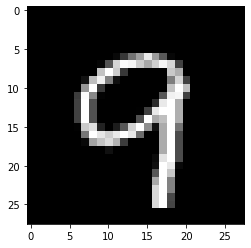

index: 798
Lable: 1


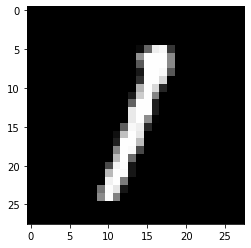

index: 3479
Lable: 5


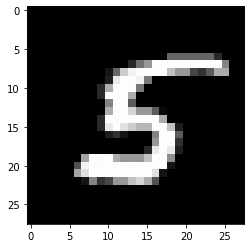

index: 3932
Lable: 6


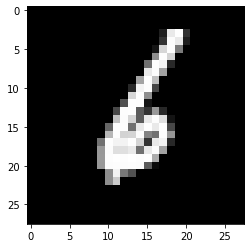

index: 1026
Lable: 1


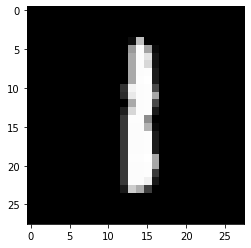

index: 5300
Lable: 8


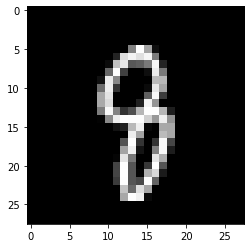

index: 4307
Lable: 7


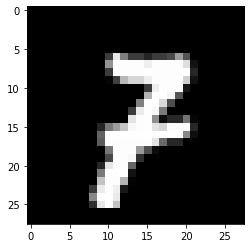

index: 1103
Lable: 1


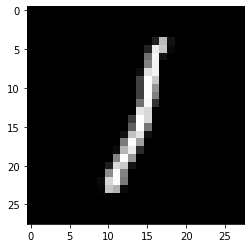

index: 2113
Lable: 3


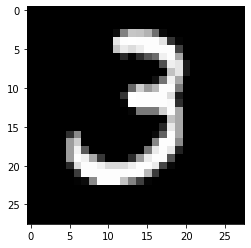

index: 4726
Lable: 7


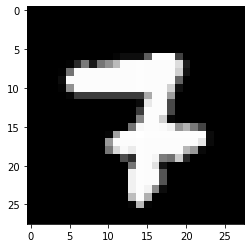

In [27]:
print("Randomly printing 10 images with labels from training dataset")

display_random_images_with_labels(new_dataset[0])

Randomly printing 10 images with labels from testing dataset
index: 716
Lable: 7


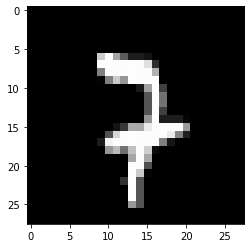

index: 514
Lable: 5


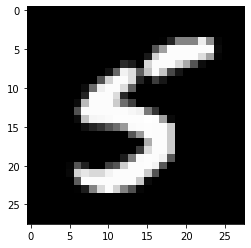

index: 745
Lable: 7


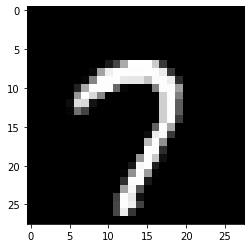

index: 336
Lable: 3


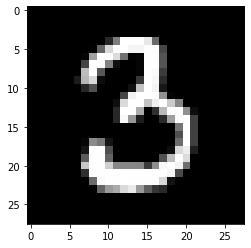

index: 283
Lable: 2


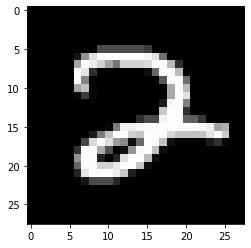

index: 220
Lable: 2


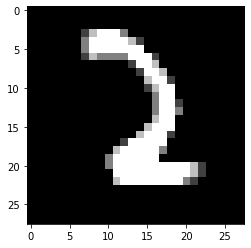

index: 307
Lable: 3


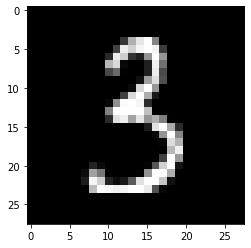

index: 820
Lable: 8


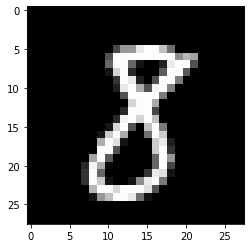

index: 254
Lable: 2


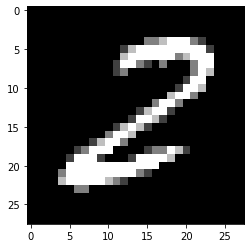

index: 848
Lable: 8


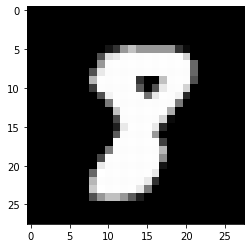

In [28]:
print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(new_dataset[1])